Created on 2023-08-21
This notebook ...

TODO: Notebook description

In [1]:
## Library imports
import os
from PlasticParcels.utils import select_files, create_directory, getclosest_ij
from PlasticParcels.helper import create_fieldset, create_particleset, create_kernel, load_default_settings, load_test_settings


In [2]:
from parcels import ParticleFile
#from plotting import plot_release_locations
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import numpy as np

In [3]:
os.getcwd()

'/Users/denes001/Research/Projects/PlasticParcels/PlasticParcels/src/DRAKKAR workshop code'

In [ ]:
'input_data_dir': 
'input_data_dir_2': './data/',
'input_data_dir_3': './data/',

'mode': '2D', # Options [3D, 2D]

# Ocean model
'ocean_dir': '',                 # Directory of ocean model data
'ocean_filename': 'psy4v3r1-daily_',          # Filename style of ocean model data
'ocean_mesh': 'coordinates.nc',

In [19]:
dirread_model = '../../data/input_data/MOi/subsets/psy4v3r1-daily_'
start_date = datetime.strptime('2019-01-01-00:00:00', '%Y-%m-%d-%H:%M:%S'), # Start date of simulation
runtime =  int(timedelta(days=360).total_seconds()/86400.)


In [20]:
start_date = start_date[0]

In [28]:
ufiles = select_files(dirread_model,'U_%4i*_med_subset.nc',start_date,runtime,i_date_s=-24, i_date_e=-14,dt_margin=3)


In [29]:
ufiles

['../../data/input_data/MOi/subsets/psy4v3r1-daily_U_2019-01-01_med_subset.nc',
 '../../data/input_data/MOi/subsets/psy4v3r1-daily_U_2019-01-02_med_subset.nc',
 '../../data/input_data/MOi/subsets/psy4v3r1-daily_U_2019-01-03_med_subset.nc',
 '../../data/input_data/MOi/subsets/psy4v3r1-daily_U_2019-01-04_med_subset.nc',
 '../../data/input_data/MOi/subsets/psy4v3r1-daily_U_2019-01-05_med_subset.nc',
 '../../data/input_data/MOi/subsets/psy4v3r1-daily_U_2019-01-06_med_subset.nc',
 '../../data/input_data/MOi/subsets/psy4v3r1-daily_U_2019-01-07_med_subset.nc',
 '../../data/input_data/MOi/subsets/psy4v3r1-daily_U_2019-01-08_med_subset.nc',
 '../../data/input_data/MOi/subsets/psy4v3r1-daily_U_2019-01-09_med_subset.nc',
 '../../data/input_data/MOi/subsets/psy4v3r1-daily_U_2019-01-10_med_subset.nc',
 '../../data/input_data/MOi/subsets/psy4v3r1-daily_U_2019-01-11_med_subset.nc',
 '../../data/input_data/MOi/subsets/psy4v3r1-daily_U_2019-01-12_med_subset.nc',
 '../../data/input_data/MOi/subsets/psy4

# User options
TODO: Write a description here

In [3]:
## User options
testing_version = 'local'
if testing_version == 'local':
    user_settings = {'user': 'denes001',
                    'output_directory': '../../data/output_data/',
                    'fig_directory': '../../fig/',
                    }
else:
    user_settings = {'user': 'denes001',
                    'output_directory': '/storage/shared/oceanparcels/output_data/data_Michael/PlasticTransportKernels/data/output_data/',
                    'fig_directory': '/storage/shared/oceanparcels/output_data/data_Michael/PlasticTransportKernels/fig/',
                    }

## Create directories if missing
create_directory(user_settings['output_directory'])
create_directory(user_settings['fig_directory'])

# Model settings
TODO: Write a description here

In [4]:
## Model settings
model_settings, particle_settings = load_test_settings()

In [5]:
#model_settings['mode'] = '2D'
#model_settings['mixing_f'] = False
#model_settings['biofouling_f'] = False


In [6]:
fieldset = create_fieldset(model_settings, particle_settings)

In [7]:
fieldset.bathymetry[0,0,0,0]

4933.0

# Particleset settings
TODO: Write description here -- user must define particle release locations

In [8]:
## Set particle release locations
n_particles = 5
lons = np.linspace(2,7,n_particles)
lats = np.linspace(40,42,n_particles)
depths = np.random.uniform(0,50, n_particles)
#times = np.linspace(0,50000,n_particles)

release_locations = {'lons': lons,
                     'lats': lats,
                     'depths': depths,
#                     'times': times
}   


## Show particle release locations
#plot_release_locations(release_locations)

In [9]:
# Other settings
wind_test = np.random.uniform(0,0.05,n_particles)
density_test = np.random.uniform(1000,1050,n_particles)
diameter_test = np.random.uniform(0.00001, 0.01, n_particles)
## Particleset settings
particle_settings.update({'release_locations': release_locations, # A dictionary of lons, lats, depths (optional), and times (optional)
                          'windage_coefficient': wind_test, # A float or Nx1 array of windage coefficients, values in [0,1] [percent of wind speed]
                          'particle_density': density_test, # A float or Nx1 array of particle densities [kg m-3]
                          'particle_diameter': diameter_test, # A float or Nx1 array of particle lengths [m]
                          'write_output_option': 'all' # Option to write variables. Options: 'none' (default), 'tracer' (saves tracer fields), 'dynamic' (saves all variables that change spatiotemporally), 'all' (saves all variables)
                           })


pset = create_particleset(fieldset, particle_settings)

/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


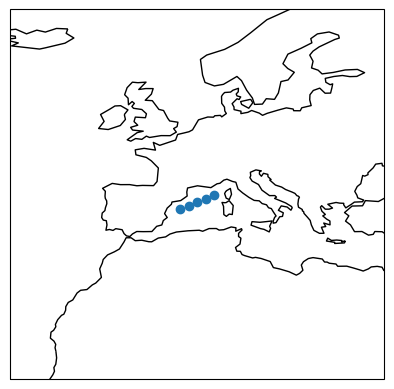

In [10]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([np.min(pset.lon)-25, np.max(pset.lon)+25, np.min(pset.lat)-25, np.max(pset.lat)+25])
plt.show()

# Kernel creation
This should be pretty simple based on the flags above

In [11]:
kernels = create_kernel(fieldset, pset)
kernels

[<function kernels.unbeaching(particle, fieldset, time)>,
 <function kernels.PolyTEOS10_bsq(particle, fieldset, time)>,
 <function parcels.application_kernels.advection.AdvectionRK4_3D(particle, fieldset, time)>,
 <function kernels.biofouling(particle, fieldset, time)>,
 <function kernels.Stokes_drift(particle, fieldset, time)>,
 <function kernels.windage_drift(particle, fieldset, time)>,
 <function kernels.vertical_mixing(particle, fieldset, time)>,
 <function kernels.checkThroughBathymetry(particle, fieldset, time)>,
 <function kernels.periodicBC(particle, fieldset, time)>,
 <function kernels.checkErrorThroughSurface(particle, fieldset, time)>,
 <function kernels.deleteParticle(particle, fieldset, time)>]

In [12]:
len_kernels = len(kernels)

In [13]:
[kernels[0]]

[<function kernels.unbeaching(particle, fieldset, time)>]

In [14]:
kernels

[<function kernels.unbeaching(particle, fieldset, time)>,
 <function kernels.PolyTEOS10_bsq(particle, fieldset, time)>,
 <function parcels.application_kernels.advection.AdvectionRK4_3D(particle, fieldset, time)>,
 <function kernels.biofouling(particle, fieldset, time)>,
 <function kernels.Stokes_drift(particle, fieldset, time)>,
 <function kernels.windage_drift(particle, fieldset, time)>,
 <function kernels.vertical_mixing(particle, fieldset, time)>,
 <function kernels.checkThroughBathymetry(particle, fieldset, time)>,
 <function kernels.periodicBC(particle, fieldset, time)>,
 <function kernels.checkErrorThroughSurface(particle, fieldset, time)>,
 <function kernels.deleteParticle(particle, fieldset, time)>]

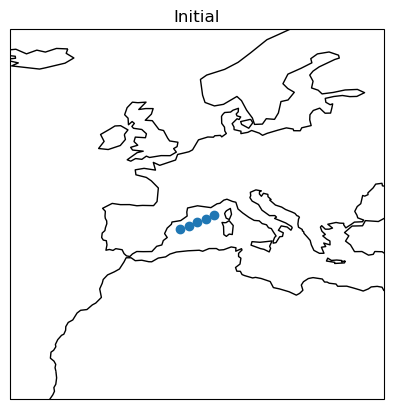

____________________ 
 Testing with unbeaching
 ____________________
INFO: Output files are stored in ../../data/output_data/trajectory/unbeaching.zarr.
100%|██████████| 259200.0/259200.0 [00:28<00:00, 9149.22it/s] 


/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


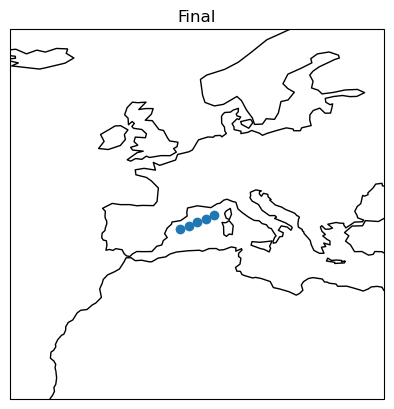

____________________ 
 Success with unbeaching
 ____________________


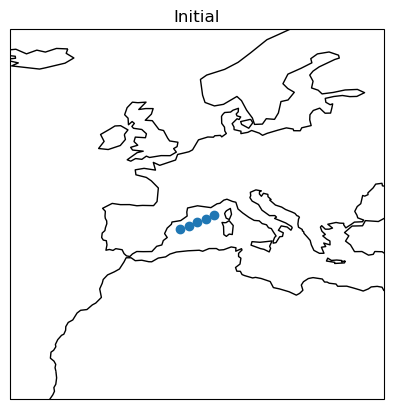

____________________ 
 Testing with PolyTEOS10_bsq
 ____________________
INFO: Output files are stored in ../../data/output_data/trajectory/PolyTEOS10_bsq.zarr.
100%|██████████| 259200.0/259200.0 [00:27<00:00, 9344.13it/s] 


/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


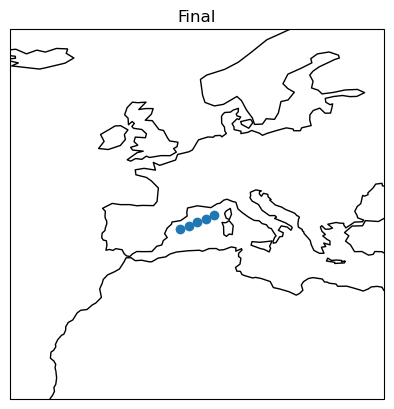

____________________ 
 Success with PolyTEOS10_bsq
 ____________________


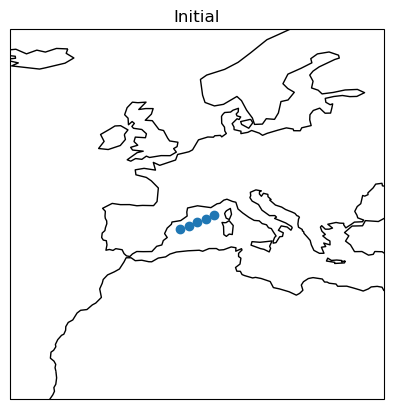

____________________ 
 Testing with AdvectionRK4_3D
 ____________________
INFO: Output files are stored in ../../data/output_data/trajectory/AdvectionRK4_3D.zarr.
 25%|██▌       | 64800.0/259200.0 [00:00<00:00, 291149.91it/s]

KeyboardInterrupt: 

In [15]:
for i in range(len_kernels-3):
    #Reset the particle set and kernels
    pset = create_particleset(fieldset, particle_settings)
    kernels = create_kernel(fieldset, pset)
    
    # Plot locations
    fig = plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.set_extent([np.min(pset.lon)-25, np.max(pset.lon)+25, np.min(pset.lat)-25, np.max(pset.lat)+25])
    plt.title("Initial")
    plt.show()


    test_kernel=kernels[i]
    kernels = [test_kernel, kernels[-3], kernels[-2], kernels[-1]]
    try:
        print("____________________ \n Testing with", test_kernel.__name__ +'\n ____________________')
        pfile = ParticleFile(user_settings['output_directory']+'trajectory/'+test_kernel.__name__+'.zarr', pset, outputdt=particle_settings['dt_write'])
        pset.execute(kernels, runtime=particle_settings['runtime'], dt=particle_settings['dt_timestep'], output_file=pfile)
        

        #Plot locations final
        fig = plt.figure()
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
        ax.coastlines()
        ax.set_extent([np.min(pset.lon)-25, np.max(pset.lon)+25, np.min(pset.lat)-25, np.max(pset.lat)+25])
        plt.title("Final")
        plt.show()
        print("____________________ \n Success with", test_kernel.__name__ +'\n ____________________')

    except Exception as error:
        print("Error with", test_kernel.__name__)
        print(error)

In [ ]:
0.004176*0.5

0.002088

In [ ]:

# for test_kernel in kernels:
#     pfile = ParticleFile(user_settings['output_directory']+test_kernel.__name__+'.zarr', pset, outputdt=particle_settings['dt_write'])
#     pset.execute(test_kernel, runtime=particle_settings['runtime'], dt=particle_settings['dt_timestep'], output_file=pfile)
kernels

[<function kernels.checkThroughBathymetry(particle, fieldset, time)>,
 <function kernels.periodicBC(particle, fieldset, time)>,
 <function kernels.checkErrorThroughSurface(particle, fieldset, time)>,
 <function kernels.deleteParticle(particle, fieldset, time)>]

/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


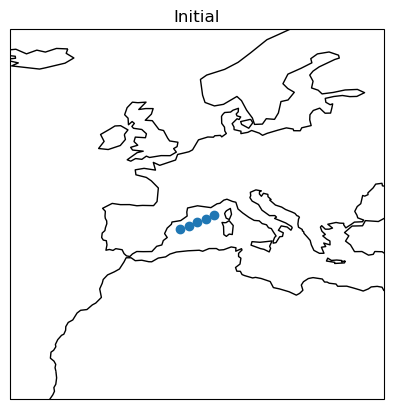

 25%|██▌       | 64800.0/259200.0 [00:13<00:00, 291149.91it/s]INFO: Output files are stored in ../../data/output_data/trajectory/unbeaching|PolyTEOS10_bsq|AdvectionRK4_3D|biofouling|Stokes_drift|windage_drift|vertical_mixing|checkThroughBathymetry|periodicBC|checkErrorThroughSurface|deleteParticle.zarr.
Correct cell not found for (nan, nan))
Debug info: old particle indices: (yi, xi) 2023 3466
            new particle indices: (yi, xi) 1805 3466
            Mesh 2d shape:  3059 4322
            Relative particle position:  (xsi, eta) nan nan
Correct cell not found for (nan, nan))
Debug info: old particle indices: (yi, xi) 2031 3480
            new particle indices: (yi, xi) 1806 3480
            Mesh 2d shape:  3059 4322
            Relative particle position:  (xsi, eta) nan nan
Correct cell not found for (nan, nan))
Debug info: old particle indices: (yi, xi) 2040 3495
            new particle indices: (yi, xi) 1802 3495
            Mesh 2d shape:  3059 4322
            Relative parti

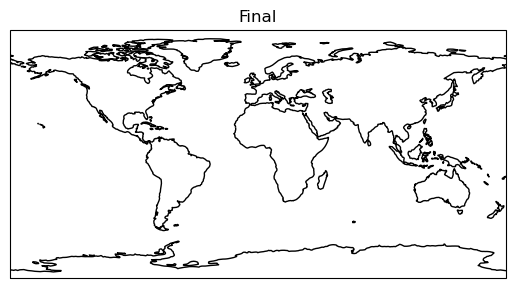

____________________ 
 Success with unbeaching|PolyTEOS10_bsq|AdvectionRK4_3D|biofouling|Stokes_drift|windage_drift|vertical_mixing|checkThroughBathymetry|periodicBC|checkErrorThroughSurface|deleteParticle
 ____________________


In [16]:
# Test with all particles
pset = create_particleset(fieldset, particle_settings)
kernels = create_kernel(fieldset, pset)
#kernels.remove(kernels[0])
#kernels.remove(kernels[4])
#kernels.remove(kernels[3])
kernel_name = '|'.join([kernel.__name__ for kernel in kernels])
# Plot locations
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([np.min(pset.lon)-25, np.max(pset.lon)+25, np.min(pset.lat)-25, np.max(pset.lat)+25])
plt.title("Initial")
plt.show()

pfile = ParticleFile(user_settings['output_directory']+'trajectory/'+kernel_name+'.zarr', pset, outputdt=particle_settings['dt_write'])
pset.execute(kernels, runtime=particle_settings['runtime'], dt=particle_settings['dt_timestep'], output_file=pfile)


#Plot locations final
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([np.min(pset.lon)-25, np.max(pset.lon)+25, np.min(pset.lat)-25, np.max(pset.lat)+25])
plt.title("Final")
plt.show()
print("____________________ \n Success with", kernel_name +'\n ____________________')


In [ ]:
## having some issues with stokes and wind without unbeaching
kernels

[<function parcels.application_kernels.advection.AdvectionRK4_3D(particle, fieldset, time)>,
 <function kernels.biofouling(particle, fieldset, time)>,
 <function kernels.Stokes_drift(particle, fieldset, time)>,
 <function kernels.windage_drift(particle, fieldset, time)>,
 <function kernels.unbeaching(particle, fieldset, time)>,
 <function kernels.vertical_mixing(particle, fieldset, time)>,
 <function kernels.checkThroughBathymetry(particle, fieldset, time)>,
 <function kernels.periodicBC(particle, fieldset, time)>,
 <function kernels.checkErrorThroughSurface(particle, fieldset, time)>,
 <function kernels.deleteParticle(particle, fieldset, time)>]

In [17]:
fieldset = create_fieldset(model_settings, particle_settings)
pset = create_particleset(fieldset, particle_settings)
kernels = create_kernel(fieldset, pset)
fieldset.computeTimeChunk(0,1)

21600

In [18]:
particle = pset[-1]
stokes_U = fieldset.Stokes_U[0, particle.depth, particle.lat, particle.lon]
stokes_V = fieldset.Stokes_V[0, particle.depth, particle.lat, particle.lon]
T_p = fieldset.wave_Tp[0, particle.depth, particle.lat, particle.lon]

wind_U = fieldset.Wind_U[0, particle.depth, particle.lat, particle.lon]
wind_V = fieldset.Wind_V[0, particle.depth, particle.lat, particle.lon]

In [19]:
T_p

10.109859466552734

In [20]:
import math
omega_p = 2. * math.pi / T_p
        
# Peak wave number
k_p = (omega_p ** 2) / fieldset.G

# Repeated inner term of Eq. (19) - note depth is negative in this formulation, but model depths are positive by convention
kp_z_2 = 2. * k_p * particle.depth

# Decay factor in Eq. (19) -- Where beta=1 for the Phillips spectrum
decay = math.exp(-kp_z_2) - math.sqrt(math.pi * kp_z_2) * math.erfc(math.sqrt(kp_z_2))

In [21]:
particle_dlon = stokes_U * decay * 60*5
particle_dlat = stokes_V * decay * 60*5

In [ ]:
particle_dlat, particle_dlon

(-1.067439272657535e-06, 1.5083891494093665e-06)

In [ ]:
if particle.depth < 0.5*particle.particle_diameter:
    print('Moving')
    # Compute particle displacement
    particle_dlon += particle.windage_coefficient * wind_U * particle.dt
    particle_dlat += particle.windage_coefficient * wind_V * particle.dt

In [ ]:
particle_dlat, particle_dlon

(-1.067439272657535e-06, 1.5083891494093665e-06)

In [ ]:
fieldset.Stokes_U[0, particle.depth, particle.lat, particle.lon], fieldset.Stokes_U[0, 0, particle.lat, particle.lon]

(2.6877727004977856e-06, 2.6877727004977856e-06)